# Analyze the Toss Data

We will load up all the data we can by scanning a set of directories.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

## Load the data

We will load everything into a pandas dataframe.

In [2]:
# Define the directory where the CSV files are located
directory = './data'

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.txt')]

# Initialize an empty list to store the DataFrames
dfs = []

# Loop over the list of CSV files
for index, file in enumerate(csv_files):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory, file))
    
    # Add a new column to the DataFrame that stores the file name
    df['file_name'] = file
    df['file_index'] = index
    df['measurement_index'] = range(1, len(df) + 1)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [3]:
df

,time,ax,ay,az,file_name,file_index,measurement_index,Time
0,0.104000,0.038305,-0.229828,9.38465,toss_data_0000.txt,0,1,NaN
1,0.214000,0.076609,-0.153219,9.69109,toss_data_0000.txt,0,2,NaN
2,0.322999,-0.038305,-0.191523,9.03991,toss_data_0000.txt,0,3,NaN
3,0.431001,-0.038305,-0.229828,9.42295,toss_data_0000.txt,0,4,NaN
4,0.539001,0.038305,-0.191523,9.19312,toss_data_0000.txt,0,5,NaN
...,...,...,...,...,...,...,...,...
437,NaN,-0.574570,0.000000,9.26973,toss_data_0016.txt,16,22,2.482
438,NaN,-1.034230,-0.076609,9.26973,toss_data_0016.txt,16,23,2.590
439,NaN,-0.766094,-0.076609,9.00160,toss_data_0016.txt,16,24,2.697
440,NaN,-1.110840,-0.153219,9.53786,toss_data_0016.txt,16,25,2.805


## A few things about the data we've loaded.

What is min and max number of measurements in each?

In [4]:
by_file = df.groupby('file_index')
print(f'Min # of measurements: {by_file.size().min()}, max: {by_file.size().max()}')

Min # of measurements: 23, max: 27


How good is the "jitter" between measurements?

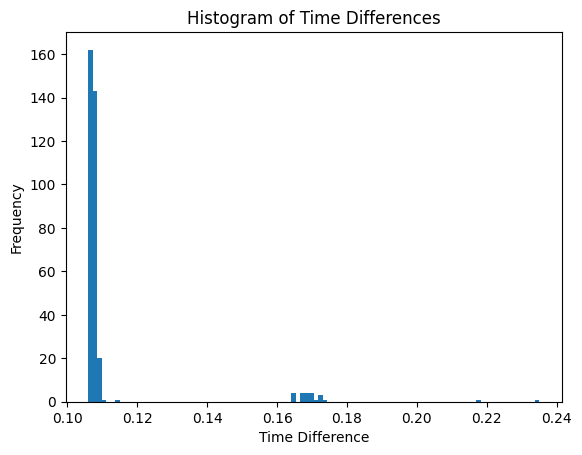

In [5]:
# Calculate the difference in the time column
df['time_diff'] = df['time'].diff()

# Plot the histogram. Simple cut of -0.5 to avoid where we reset the times
# this means we don't have to do a group by to get the measurements right.
df[df.time_diff > -0.5].time_diff.plot(kind='hist', bins=100)
plt.xlabel('Time Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.show()

Quickly - what are the large 0.16 guys there?

In [6]:
df[df.time_diff > 0.16]

,time,ax,ay,az,file_name,file_index,measurement_index,Time,time_diff
10,1.255000,0.038305,-0.268133,9.537860,toss_data_0000.txt,0,11,NaN,0.174000
82,0.340996,3.294200,0.536266,8.656860,toss_data_0003.txt,3,2,NaN,0.235001
96,1.909000,3.753860,0.804398,8.388730,toss_data_0003.txt,3,16,NaN,0.172000
108,0.273003,3.715550,6.818230,5.439260,toss_data_0004.txt,4,2,NaN,0.168999
122,1.841000,3.715550,6.741620,5.554180,toss_data_0004.txt,4,16,NaN,0.171000
134,0.275002,4.175210,-4.328430,7.316190,toss_data_0005.txt,5,2,NaN,0.168999
148,1.839000,4.443340,-3.753860,7.507720,toss_data_0005.txt,5,16,NaN,0.168990
160,0.273010,-0.421352,0.574570,9.729390,toss_data_0006.txt,6,2,NaN,0.166992
173,1.734010,-7.852460,4.175210,2.183370,toss_data_0006.txt,6,15,NaN,0.172000
183,0.273987,3.792160,0.727789,11.376500,toss_data_0007.txt,7,2,NaN,0.166992


That seems to say something happens when you write out the file the first time. Perhaps we should hold everything in memory and then flush it - and avoid this?

This is interesting because our data has to be interpreted and we aren't putting anything about delta-t in there (I hope).

## Looking at the data

Mainly, we want to see if the data looks any different between the various types of throws we've done.

Lets look at the total acceleration first.

In [7]:
df['a'] = (df.ax**2 + df.ay**2 + df.az**2).apply(sqrt)

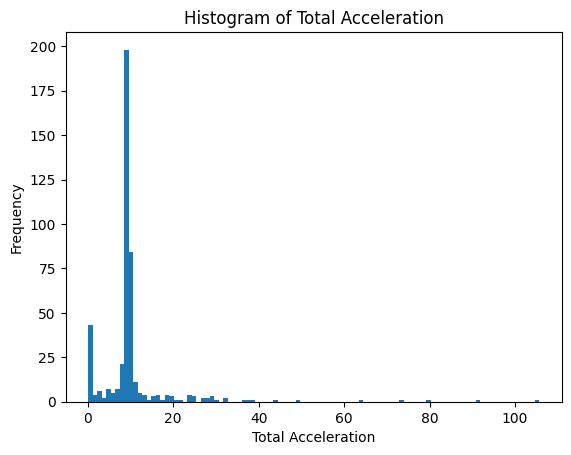

In [8]:
df['a'].plot(kind='hist', bins=100)
plt.xlabel('Total Acceleration')
plt.ylabel('Frequency')
plt.title('Histogram of Total Acceleration')
plt.show()

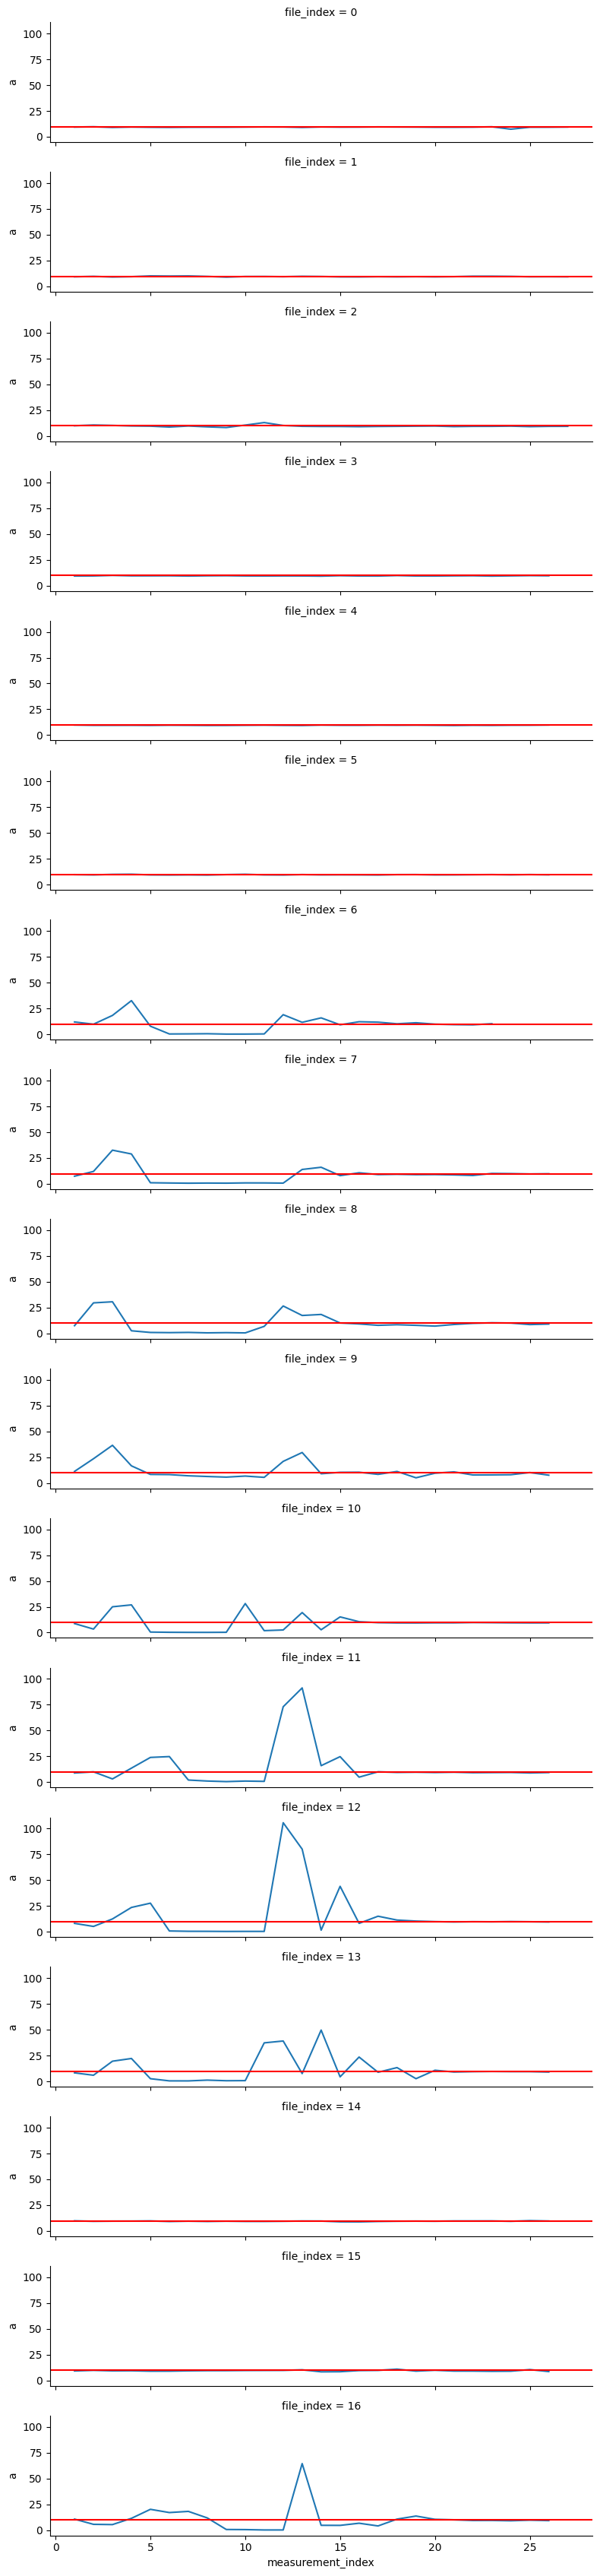

In [9]:
# Create a FacetGrid with file_index as the row variable
g = sns.FacetGrid(data=df, row='file_index', sharey=True, aspect=4, height=2)

# Plot line plots for each file_index
g.map(sns.lineplot, 'measurement_index', 'a')

# Add a red line at 9.8
g.map(plt.axhline, y=9.8, color='red')

# Adjust the layout of the plots
g.fig.tight_layout()

# Show the plots
plt.show()


Ok these things are different - but telling the difference between a toss straight up and a longer toss is going to be difficult!